### Cluster Map
----
#### 【目的】
##### Hierarchial_Clustering.ipynb と内容は同じだが、見た目が何となく受け付けないので、seabornでいい感じにしてみる

#### 【方法】
##### PCAなど適切な処理が既に行われたデータセットに対してcorrelationを計算して、そこからclusgter map作成

In [1]:
#Import library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
# Set Config
CONFIG = {
  "file" : "PCAed_data.csv"
    , "size": (5, 5)
    , "fontsize": 1.5
    , "rotation": (0, 0)
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "sc": None
    , "dendrosize": (0.1, 0.1)
    , "cbarpos": (1.05, 0.15, 0.05, 0.7)
}

In [11]:
# Load Data
df = pd.read_csv(CONFIG['file'], index_col=0).T

In [12]:
# Calculating Correlation
cor = df.corr()

<Figure size 360x360 with 0 Axes>

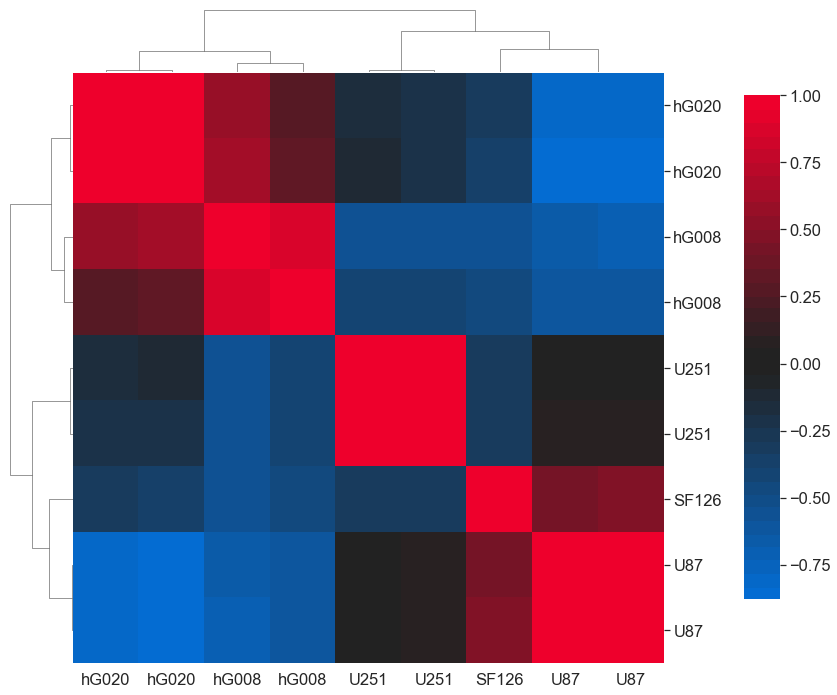

In [13]:
# Cluster Map
plt.figure(figsize=CONFIG["size"])
sns.set(font_scale=CONFIG["fontsize"])
CM = sns.clustermap(cor
               , cmap=CONFIG["color"]
               , robust=True
               , center=cor.mean().mean()
               , row_colors=CONFIG["sc"]
               , col_colors=CONFIG["sc"]
               , dendrogram_ratio=CONFIG["dendrosize"]
               , cbar_pos=CONFIG["cbarpos"]
              )
plt.setp(CM.ax_heatmap.get_xticklabels(), rotation=CONFIG["rotation"][0])
plt.setp(CM.ax_heatmap.get_yticklabels(), rotation=CONFIG["rotation"][1])
plt.savefig("./PCAed_ClusterMap.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)